# Different types of data
1. Cross sectional
* Time series
* Panel

In [18]:
# from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
# os.chdir('E:\Practical Time Series')

In [4]:
data = pd.read_csv('C:\\Users\\sridevi.tolety\\Documents\\StudyReferences\\Python Scripts\\Practical_Time_Series_Python\\Data Files\\WDIData.csv')

In [5]:
print('Column names:', data.columns)

Column names: Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', 'Unnamed: 62'],
      dtype='object')


In [6]:
print('No. of rows, columns:', data.shape)

No. of rows, columns: (409992, 63)


In [7]:
nb_indicators = data['Indicator Name'].unique().shape[0]
print('Unique number of indicators:', nb_indicators)

Unique number of indicators: 1553


In [8]:
nb_countries = data['Country Code'].unique().shape[0]
print('Unique number of countries:', nb_countries)

Unique number of countries: 264


## Cross sectional data
* Obtained by taking observations from multiple individuals at the same point in time.
* Cross-sectional data can comprise of observations taken at different points in time, however, in such cases time usually does not play any significant role in the analysis. 
* Represents a snapshot at a given instance of time
* Customer data for churn analysis can be obtained from over a span of time such as years and months. But for the purpose of analysis, time might not play an important role and therefore it may still be considered as a cross-sectional dataset.
* Analysisstarts with a plot of the variables to visualize their statistical properties such as central tendency, dispersion, skewness, and kurtosis.

In [9]:
central_govt_debt = data.loc[data['Indicator Name']=='Central government debt, total (% of GDP)']
military_exp = data.loc[data['Indicator Name']=='Military expenditure (% of GDP)']

In [10]:
print('Shape of central_govt_debt:', central_govt_debt.shape)
print('Shape of military_exp:', military_exp.shape)

Shape of central_govt_debt: (264, 63)
Shape of military_exp: (264, 63)


In [13]:
central_govt_debt['2010'].describe()
military_exp['2010'].describe()

count    191.000000
mean       1.999261
std        1.350623
min        0.148690
25%        1.201177
50%        1.618759
75%        2.640259
max        8.565679
Name: 2010, dtype: float64

In [15]:
central_govt_debt.index = central_govt_debt['Country Code']
military_exp.index = military_exp['Country Code']

In [16]:
central_govt_debt_2010 = central_govt_debt['2010'].loc[~pd.isnull(central_govt_debt['2010'])]
military_exp_2010 = military_exp['2010'].loc[~pd.isnull(military_exp['2010'])]
data_to_plot = pd.concat((central_govt_debt_2010, military_exp_2010), axis=1)
data_to_plot.columns = ['central_govt_debt', 'military_exp']
data_to_plot.head(10)

,central_govt_debt,military_exp
AFG,NaN,1.897473
AGO,NaN,4.244884
ALB,NaN,1.558592
ARB,NaN,5.117807
ARE,NaN,6.038592
ARG,NaN,0.814878
ARM,NaN,4.265646
ATG,74.475616,NaN
AUS,29.340860,1.950739
AUT,85.528445,0.824770


In [17]:
data_to_plot = data_to_plot.loc[(~pd.isnull(data_to_plot.central_govt_debt)) & (~pd.isnull(data_to_plot.military_exp)), :]

In [18]:
data_to_plot.head()

,central_govt_debt,military_exp
AUS,29.340860,1.950739
AUT,85.528445,0.824770
AZE,6.385576,2.791004
BEL,92.404303,1.084631
BGR,21.597175,1.765384


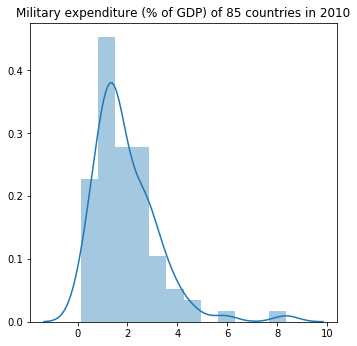

In [24]:
plt.figure(figsize=(5.5, 5.5))
g = sns.distplot(np.array(data_to_plot.military_exp), norm_hist=False)
g.set_title('Military expenditure (% of GDP) of 85 countries in 2010')
plt.savefig('plots/Section 1/01_01.png', format='png', dpi=300)

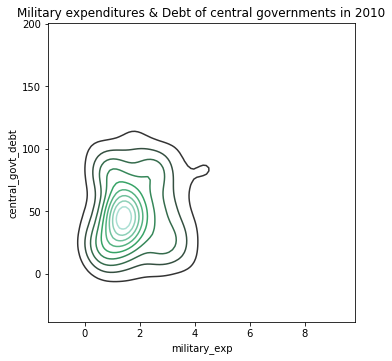

In [26]:
plt.figure(figsize=(5.5, 5.5))
g = sns.kdeplot(data_to_plot.military_exp, data2=data_to_plot.central_govt_debt)
g.set_title('Military expenditures & Debt of central governments in 2010')
plt.savefig('plots/Section 1/_01_02.png', format='png', dpi=300)

In [30]:
central_govt_debt_us = central_govt_debt.loc[central_govt_debt['Country Code']=='USA', :].T
military_exp_us = military_exp.loc[military_exp['Country Code']=='USA', :].T

In [31]:
data_us = pd.concat((military_exp_us, central_govt_debt_us), axis=1)
index0 = np.where(data_us.index=='1960')[0][0]
index1 = np.where(data_us.index=='2010')[0][0]
data_us = data_us.iloc[index0:index1+1,:]
data_us.columns = ['Federal Military Expenditure', 'Debt of Federal Government']
data_us.head(20)

,Federal Military Expenditure,Debt of Federal Government
1960,8.35266,NaN
1961,8.48713,NaN
1962,8.65659,NaN
1963,8.18901,NaN
1964,7.46763,NaN
1965,6.9688,NaN
1966,7.80025,NaN
1967,8.75572,NaN
1968,8.56573,NaN
1969,7.98539,NaN


In [32]:
data_us.dropna(inplace=True)
print('Shape of data_us:', data_us.shape)

Shape of data_us: (22, 2)


In [33]:
data_us.head(20)

,Federal Military Expenditure,Debt of Federal Government
1989,5.37472,39.017
1990,5.12025,40.8214
1991,4.53985,43.948
1992,4.66626,45.9165
1993,4.32693,48.1047
1994,3.94129,47.2141
1995,3.63849,47.0598
1996,3.35074,46.5855
1997,3.2099,43.9588
1998,3.01764,41.0099


## Time series data

* Quantitative observations on one or more measurable characteristics of an individual entity and taken at multiple points in time
* Time series data is typically characterized by several interesting internal structures such as trend, seasonality, tationarity, autocorrelation, and so on

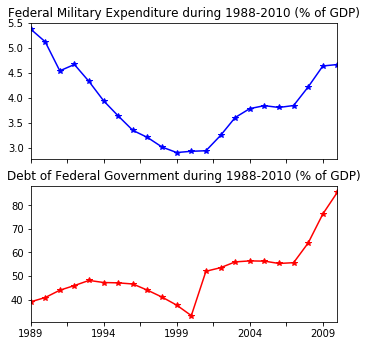

In [34]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
f.set_size_inches(5.5, 5.5)
axarr[0].set_title('Federal Military Expenditure during 1988-2010 (% of GDP)')
data_us['Federal Military Expenditure'].plot(linestyle='-', marker='*', color='b', ax=axarr[0])
axarr[1].set_title('Debt of Federal Government during 1988-2010 (% of GDP)')
data_us['Debt of Federal Government'].plot(linestyle='-', marker='*', color='r', ax=axarr[1])
plt.savefig('plots/Section 1_01_03.png', format='png', dpi=300)

## Panel data
* If we observe multiple entities over multiple points in time we get a panel data also known as longitudinal data.
* A generic panel data regression model can be stated as $$y_it = W * x _it + b+ \epsilon_{it}$$, which expresses the dependent variable $y_{it}$ as a linear model of explanatory variable $x_{it}$, where $W$ are weights of $x_{it}$, $b$ is the bias term, and $\epsilon_{it}$  is the error. 
* i represents individuals for whom data is collected for multiple points in time represented by j.
* This type of panel data analysis seeks to model the variations across both multiple individual and multiple points in time. 

In [39]:
chn = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
(data['Country Code']=='CHN'),index0:index1+1
]
chn = pd.Series(data=chn.values[0], index=chn.columns)
chn.dropna(inplace=True)
usa = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
(data['Country Code']=='USA'),index0:index1+1
]
usa = pd.Series(data=usa.values[0], index=usa.columns)
usa.dropna(inplace=True)
ind = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
(data['Country Code']=='IND'),index0:index1+1
]
ind = pd.Series(data=ind.values[0], index=ind.columns)
ind.dropna(inplace=True)
gbr = data.ix[(data['Indicator Name']=='Military expenditure (% of GDP)')&\
(data['Country Code']=='GBR'),index0:index1+1
]
gbr = pd.Series(data=gbr.values[0], index=gbr.columns)
gbr.dropna(inplace=True)

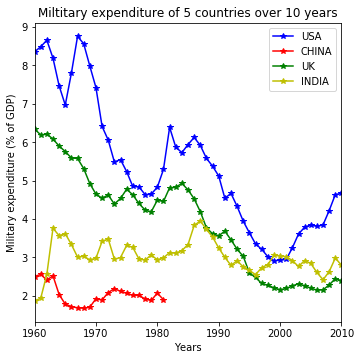

In [40]:
plt.figure(figsize=(5.5, 5.5))
usa.plot(linestyle='-', marker='*', color='b')
chn.plot(linestyle='-', marker='*', color='r')
gbr.plot(linestyle='-', marker='*', color='g')
ind.plot(linestyle='-', marker='*', color='y')
plt.legend(['USA','CHINA','UK','INDIA'], loc=1)
plt.title('Miltitary expenditure of 5 countries over 10 years')
plt.ylabel('Military expenditure (% of GDP)')
plt.xlabel('Years')
plt.savefig('plots/Section 1_01_04.png', format='png', dpi=300)

# Internal structures of time series

In [5]:
data = pd.read_excel('https://github.com/s-totally/Practical-Time-Series-Analysis-Python/blob/master/Data%20Files/Monthly_CO2_Concentrations.xlsx?raw=true',
          converters={'Year': np.int32, 'Month': np.int32})           
# data = pd.read_excel('datasets/Monthly_CO2_Concentrations.xlsx',
# converters={'Year': np.int32, 'Month': np.int32})
data.head()

,CO2,Year,Month
0,333.13,1974,5
1,332.09,1974,6
2,331.10,1974,7
3,329.14,1974,8
4,327.36,1974,9


In [6]:
data = data.dropna()

In [7]:
data.sort_values(['Year', 'Month'], inplace=True)

## Trend

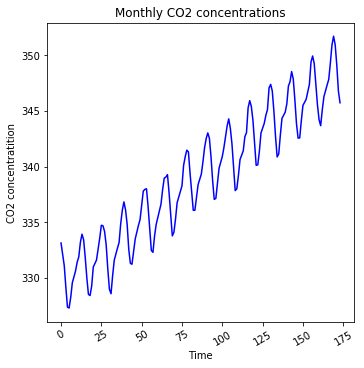

In [8]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time')
plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);
# plt.savefig('plots/Section 1/_01_05.png', format='png', dpi=300)

Zooming in on 1980 and 1981, we see that the trend is not visible

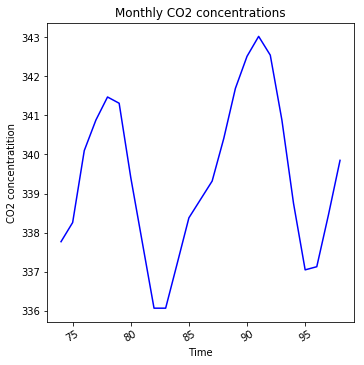

In [9]:
plt.figure(figsize=(5.5, 5.5))
data['CO2'].loc[(data['Year']==1980) | (data['Year']==1981)].plot(color='b')
plt.title('Monthly CO2 concentrations')
plt.xlabel('Time'), plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);
# plt.savefig('plots/Section 1/_01_06.png', format='png', dpi=300)

Fitting a trend line to the data 

In [11]:
from sklearn.linear_model import LinearRegression
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.array(data.index).reshape((-1,1)), data['CO2']) # What does reshape do? 
# https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], trend_model.intercept_) 
)

Trend model coefficient=0.11182207854546031 and intercept=329.4554222337025


## 2. Seasonality

Seasonality manifests as repetitive and period variations in a time series, such as those seen in the de-trended observations of CO2 emissions. Peaks and troughs in the monthly sales volume of seasonal goods such as Christmas gifts or seasonal clothing is another example of a time series with seasonality.

A practical technique of determining seasonality is through exploratory data analysis through the following plots:
1. Run sequence plot
* Seasonal sub series plot
* Multiple box plots

### 2.1 Run sequence plot 
A simple run sequence plot of the original time series with time on x-axis and the variable on y-axis is good for indicating the following properties of the time series:
1. Movements in mean of the series
* Shifts in variance
* Presence of outliers

The plot of the de-trended time series of the CO2 concentrations is an example of a run sequence plot.

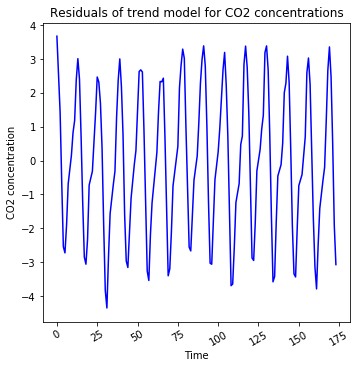

In [12]:
residuals = np.array(data['CO2']) - trend_model.predict(np.array(data.index).reshape((-1,1)))
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=data.index).plot(color='b')
plt.title('Residuals of trend model for CO2 concentrations')
plt.xlabel('Time'), plt.ylabel('CO2 concentration')
plt.xticks(rotation=30);
# plt.savefig('plots/Section 1/_01_07.png', format='png', dpi=300)

In [13]:
data['Residuals'] = residuals
month_quarter_map = {1: 'Q1', 2: 'Q1', 3: 'Q1',4: 'Q2', 5: 'Q2', 6: 'Q2',
                     7: 'Q3', 8: 'Q3', 9: 'Q3', 10: 'Q4', 11: 'Q4', 12: 'Q4'}
data['Quarter'] = data['Month'].map(lambda m: month_quarter_map.get(m))

### 2.2 Seasonal sub series plot

For a known periodicity of seasonal variations, seasonal sub series redraws the original series over batches of successive time periods. For example, the periodicity in the CO2 concentrations is 12 months. To visualize seasonality in the residuals, we create quarterly mean and standard deviations.

A seasonal sub series reveals two properties:
1. Variations within seasons as within a batch of successive months
* Variations between seasons as between batches of successive months

In [14]:
seasonal_sub_series_data = data.groupby(by=['Year', 'Quarter'])['Residuals'].aggregate([np.mean, np.std]) 
seasonal_sub_series_data.columns = ['Quarterly Mean', 'Quarterly Standard Deviation']
seasonal_sub_series_data.head()

Quarterly Mean  Quarterly Standard Deviation
Year Quarter                                              
1974 Q2             3.098667                      0.814461
     Q3            -0.590888                      1.982503
     Q4            -1.769688                      1.024070
1975 Q1             0.723024                      0.520922
     Q2             2.600891                      0.355315

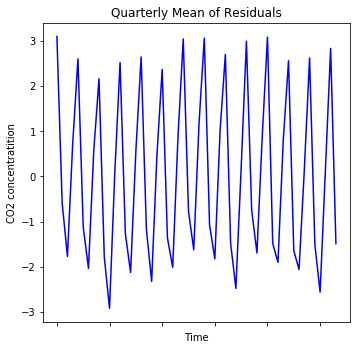

In [15]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Mean'].plot(color='b')
plt.title('Quarterly Mean of Residuals'), plt.xlabel('Time'), plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);
# plt.savefig('plots/Section 1/_01_08.png', format='png', dpi=300)

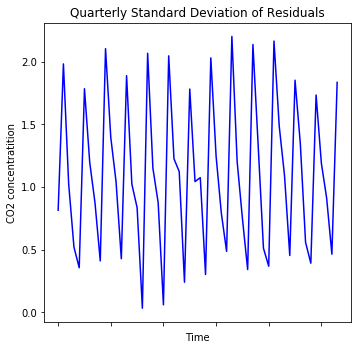

In [16]:
plt.figure(figsize=(5.5, 5.5))
seasonal_sub_series_data['Quarterly Standard Deviation'].plot(color='b')
plt.title('Quarterly Standard Deviation of Residuals'), plt.xlabel('Time'), plt.ylabel('CO2 concentratition')
plt.xticks(rotation=30);
# plt.savefig('plots/Section 1/_01_09.png', format='png', dpi=300)

### 2.3 Multiple box plots

The seasonal sub series plot can be more informative when redrawn with seasonal box plots. A box plot displays both central tendency and dispersion within the seasonal data over a batch of time units. Besides, separation between two adjacent box plots reveala the within season variations.

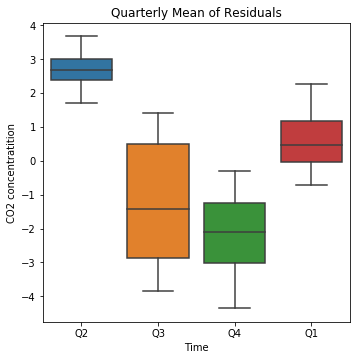

In [19]:
plt.figure(figsize=(5.5, 5.5))
g = sb.boxplot(data=data, y='Residuals', x='Quarter')
g.set_title('Quarterly Mean of Residuals'), g.set_xlabel('Time'), g.set_ylabel('CO2 concentratition');
# plt.savefig('plots/Section 1/_01_10.png', format='png', dpi=300)

## 3. Cyclical changes
* Movements observed after every few units of time, but they occur lessfrequently than seasonal fluctuations
* Average periodicity for cyclical changes would be larger (most commonly in years)
* A long run plot of the time series is required to identify cyclical changes that can occur, for example, every few years and manifests as repetitive crests and troughs. 

In [20]:
inflation = pd.read_excel('https://github.com/s-totally/Practical-Time-Series-Analysis-Python/blob/master/Data%20Files/inflation-consumer-prices-annual.xlsx?raw=true')
# inflation = pd.read_excel('datasets/inflation-consumer-prices-annual.xlsx', parse_dates=['Year'])
inflation.head()

,Year,India,United States
0,1960-01-01,1.783265,1.509929
1,1961-01-01,1.752022,1.075182
2,1962-01-01,3.576159,1.116071
3,1963-01-01,2.941176,1.214128
4,1964-01-01,13.354037,1.308615


In [21]:
inflation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 3 columns):
Year             57 non-null datetime64[ns]
India            57 non-null float64
United States    57 non-null float64
dtypes: datetime64[ns](1), float64(2)
memory usage: 1.4 KB


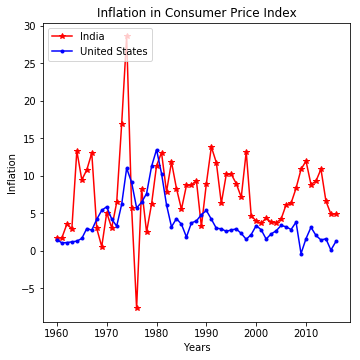

In [22]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(1960,2017), inflation['India'], linestyle='-', marker='*', color='r')
plt.plot(range(1960,2017), inflation['United States'], linestyle='-', marker='.', color='b')
plt.legend(['India','United States'], loc=2), plt.title('Inflation in Consumer Price Index'), plt.ylabel('Inflation'), plt.xlabel('Years');
# plt.savefig('plots/Section 1/_01_11.png', format='png', dpi=300)

## 4. Unexpected variations
In spite of being able to account for the three other components, we might still be left with an irreducible error component that is random and does not exhibit systematic dependency on the time index. This fourth component reflects unexpected
variations in the time series. These are stochastic and cannot be framed in a mathematical model for a definitive future prediction. This type of error is due to lack of information about explanatory variables that can model these variations or due to presence of a random noise.

# Models for time series analysis
1. Zero mean models 
* Random walk models
* Trend models
* Seasonality models

### 1. Zero mean models 
* Constant mean and constant variance
* Shows no predictable trends or seasonality
* Independent and identically distributed (iid) and represent the random noise around a fixed mean, which has been deducted from the time series as a constant term.
* Suitable for representing irregular component of a time series of a continuous variable

Let us consider that $X_1$, $X_2$, ... ,$X_n$ represent the random variables corresponding to $n$ observations of a zero mean model.
 If $x_1$, $x_2$, ... ,$x_n$ are $n$ observations from the zero mean time series, then the joint distribution of the observations is given as a product of probability mass function for every time index as follows:
 
$P(X_1 = x_1,X_2 = x_2 , ... , X_n = x_n) = f(X_1 = x_1) f(X_2 = x_2) ... f(X_n = x_n)$

Most commonly $f(X_t = x_t)$ is modeled by a normal distribution of mean zero and variance $σ^2$, which is assumed to be the irreducible error of the model and hence treated as a random noise. 

In [24]:
zero_mean_series = np.random.normal(loc=0.0, scale=1., size=100)

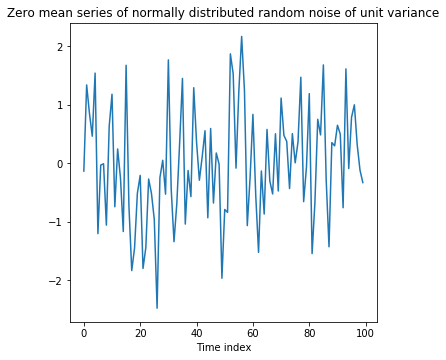

In [25]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(zero_mean_series)
plt.title('Zero mean series of normally distributed random noise of unit variance')
plt.xlabel('Time index'); 
# g = sb.tsplot(zero_mean_series)
# g.set_title('Zero mean model')
# g.set_xlabel('Time index')
# plt.savefig('plots/Section 1/_01_12.png', format='png', dpi=300)

### 2. Random walk models
A random walk is given as a sum of n iids, which has zero mean and constant variance.
The realization of a random walk at time index $t$ is given by the sum $S = x_1 + x$2 + ... + x$n$. 

The following figure shows the random walk obtained from iids, which vary according to a normal distribution of zero mean and unit variance.

The random walk is important because if such behavior is found in a time series, it can be easily reduced to zero mean model by taking differences of the observations from two consecutive time indices, as $S_t - S_{t-1} = x_t$ is an iid with zero mean and constant variance.

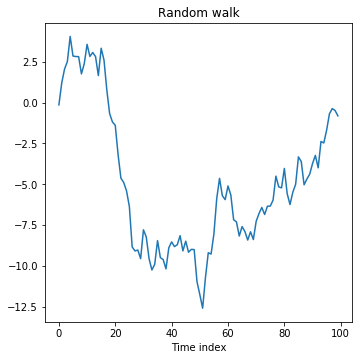

In [26]:
random_walk = np.cumsum(zero_mean_series)
plt.figure(figsize=(5.5, 5.5))
plt.plot(random_walk)
plt.title('Random walk'), plt.xlabel('Time index');
# g = sb.lineplot(random_walk)
# g.set_title('Random Walk')
# g.set_xlabel('Time index');
# plt.savefig('plots/Section 1/_01_13.png', format='png', dpi=300)

### 2. Trend models
This type of model aims to capture the long run trend in the time series that can be fitted as linear regression of the time index. 

When the time series does not exhibit any periodic or seasonal fluctuations, it can be expressed just as the sum of the trend and the zero mean model as 

$$ x_t = \mu_t + y_t$$, 

where $\mu_t$ is the time-dependent long run trend of the series.

The choice of the trend model $\mu_t$ is critical to correctly capturing the behavior of the time series. Exploratory data analysis often provides hints for hypothesizing whether the model should be linear or non-linear in t. 

* A linear model is simply $\mu_t = w_t + b$
* Quadratic model is $\mu_t = w_{1t} + {w_{2t}}^2 + b$

Sometimes, the trend can be hypothesized by a more complex relationship in terms of the time index such as $\mu_t= {w_{0t}}^p + b$.

### Seasonality models
* Periodic and repetitive fluctuations in a time series 
* Modeled as sum of weighted sum of sine waves of known periodicity
* Seasonality models are also known as harmonic regression model as they attempt to fit the sum of multiple sin waves.

# Autocorrelation and Partial autocorrelation

After applying the mathematical transformations discussed in the previous section, we will often be left with what is known as a stationary (or weakly stationary) time series, which is characterized by 
* a constant mean $E(x_t)$; and
* correlation that depends only on the time lag between two time steps, but independent of the value of the time step.

This type of covariance is the key in time series analysis and is called autocovariance or autocorrelation when normalized to the range of -1 to 1. 

* Autocorrelation is therefore expressed as the second order moment $E(x_tx_{t+h}) = g(h)$ that is a function of only the time lag h and independent of the actual time index t. 
* This special definition of autocorrelation ensures that it is a time-independent property and hence can be reliably used for making inference about future realization of the time series.
* It reflects the degree of linear dependency between the time series at index t and the time series at indices t-h or t+h


In [27]:
djia_df = pd.read_excel('https://github.com/s-totally/Practical-Time-Series-Analysis-Python/blob/master/Data%20Files/DJIA_Jan2016_Dec2016.xlsx?raw=true')
djia_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000
5,2016-01-11,16358.709961,16461.849609,16232.030273,16398.570313,16398.570313,127790000
6,2016-01-12,16419.109375,16591.349609,16322.070313,16516.220703,16516.220703,117480000
7,2016-01-13,16526.630859,16593.509766,16123.200195,16151.410156,16151.410156,153530000
8,2016-01-14,16159.009766,16482.050781,16075.120117,16379.049805,16379.049805,158830000
9,2016-01-15,16354.330078,16354.330078,15842.110352,15988.080078,15988.080078,239210000


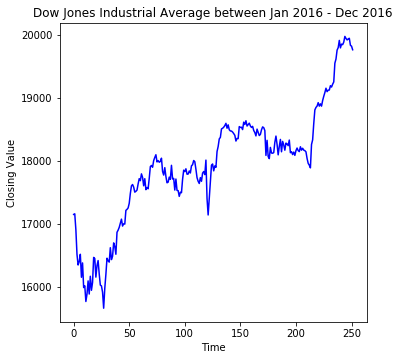

In [28]:
plt.figure(figsize=(5.5, 5.5))
djia_df['Close'].plot(color='b')
plt.title('Dow Jones Industrial Average between Jan 2016 - Dec 2016')
plt.xlabel('Time'), plt.ylabel('Closing Value');
# plt.savefig('plots/Section 1/_01_14.png', format='png', dpi=300)

In [35]:
lag = range(0,31)
djia_acf = [] # Empty list to hold values of acf at different lags
for l in lag:
    autocor = djia_df['Close'].autocorr(l)
    print("Autocorrelation at lag {} is {}".format(l, np.round(autocor,2)))
    djia_acf.append(autocor)
# djia_acf

Autocorrelation at lag 0 is 1.0
Autocorrelation at lag 1 is 0.99
Autocorrelation at lag 2 is 0.98
Autocorrelation at lag 3 is 0.97
Autocorrelation at lag 4 is 0.96
Autocorrelation at lag 5 is 0.95
Autocorrelation at lag 6 is 0.95
Autocorrelation at lag 7 is 0.94
Autocorrelation at lag 8 is 0.93
Autocorrelation at lag 9 is 0.92
Autocorrelation at lag 10 is 0.91
Autocorrelation at lag 11 is 0.9
Autocorrelation at lag 12 is 0.89
Autocorrelation at lag 13 is 0.88
Autocorrelation at lag 14 is 0.87
Autocorrelation at lag 15 is 0.86
Autocorrelation at lag 16 is 0.86
Autocorrelation at lag 17 is 0.85
Autocorrelation at lag 18 is 0.84
Autocorrelation at lag 19 is 0.82
Autocorrelation at lag 20 is 0.81
Autocorrelation at lag 21 is 0.8
Autocorrelation at lag 22 is 0.78
Autocorrelation at lag 23 is 0.76
Autocorrelation at lag 24 is 0.75
Autocorrelation at lag 25 is 0.73
Autocorrelation at lag 26 is 0.71
Autocorrelation at lag 27 is 0.7
Autocorrelation at lag 28 is 0.69
Autocorrelation at lag 29 is

[1.0,
 0.9895130369496231,
 0.9806764070648086,
 0.971174923973686,
 0.9621472564130319,
 0.9538955578803275,
 0.9459032580126119,
 0.9373075926873524,
 0.9290147271220562,
 0.9192206772755743,
 0.9118894094164673,
 0.9028765878729627,
 0.8932481843136315,
 0.8835035597611822,
 0.8731827800787128,
 0.8648313697677512,
 0.8557828894032221,
 0.8481901051170221,
 0.8383215873955487,
 0.8231518494598219,
 0.8105441076424135,
 0.7960848058188384,
 0.7797013088226319,
 0.7626145710121085,
 0.7466721216956723,
 0.7303423535354974,
 0.7143361278204305,
 0.7001183406628613,
 0.6889074491208036,
 0.6758002967443381,
 0.6606529974714157]

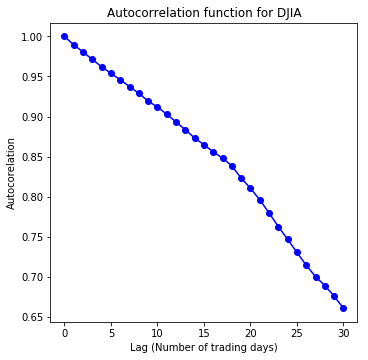

In [37]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(djia_acf, marker='o', color='b')
plt.title('Autocorrelation function for DJIA')
plt.xlabel('Lag (Number of trading days)')
plt.ylabel('Autocorelation');

The `plot_acf` function of `statsmodels.graphics.tsaplots` computes and plots the autocorrelation at various lags. 

Additionally, this function also plots the 95% confidence intervals. 

Autocorrelation outside these confidence intervals is statistically significant while those inside the confidence intervals are due to random noise.

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 396x396 with 0 Axes>

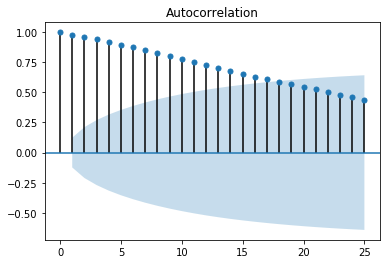

In [41]:
#Plot autocorrelation and confidence intervals using the plot_acf function
plt.figure(figsize=(5.5, 5.5))
plot_acf(djia_df['Close'], lags=25);

* Time series tend to carry information and dependency structures in steps, therefore autocorrelation at lag $h$ is also influenced by the intermediate variables $x_t$, $x_{t+1}$, .., $x_{t+h-1}$. 
* Therefore, autocorrelation is not the correct measure of the mutual correlation between $x_t$ and $x_{t+h}$ in the presence of the intermediate variables. 
* PACF solves this problem by measuring the correlation between $x_t$ and $x_{t+h}$ when the influence of the intermediate variables has been removed.
* PACF defines the correlation between $x_t$ and $x_{t+h}$ which is not accounted for by lags $t+1$ to $t+h-1$.
* Helps in identifying the order h of an AR(h) model

<Figure size 396x396 with 0 Axes>

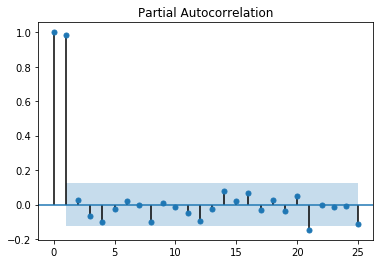

In [43]:
#Plot partial autocorrelation and confidence intervals using the plot_acf function
plt.figure(figsize=(5.5, 5.5))
plot_pacf(djia_df['Close'], lags=25);

__Interpretation__:
* The first partial autocorrelation at lag 0 is always 1. 
* In the above figure, PACF at lag 1 is statistically significant while for the rest of the lags it is within the 95% confidence intervals. 
* Hence, the order of AR models is one.